(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size
n_samples: 450
n_features: 90000
n_classes: 9
Extracting the top 200 eigen faces from 337 faces


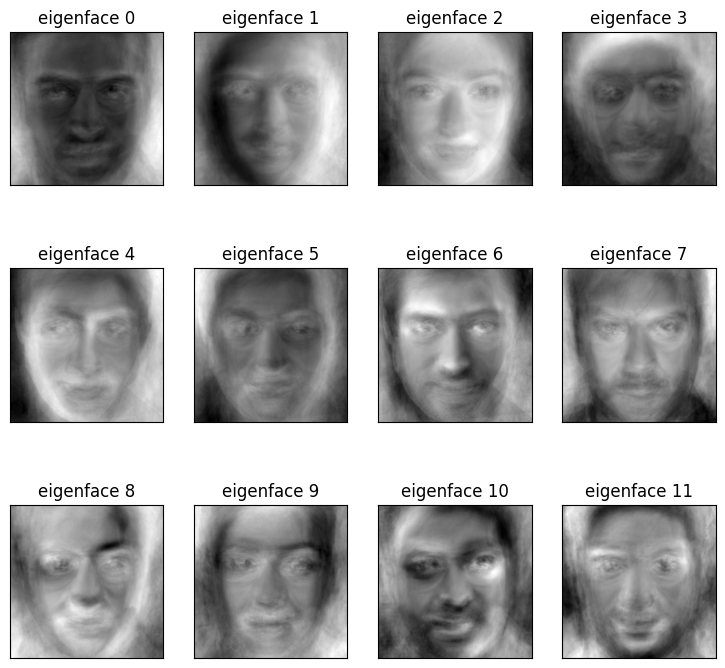

Projecting the input data on the eigenfaces orthonormal basis
(337, 200) (113, 200)
Iteration 1, loss = 2.46185142
Iteration 2, loss = 2.13127795
Iteration 3, loss = 1.92067225
Iteration 4, loss = 1.74670615
Iteration 5, loss = 1.58787700
Iteration 6, loss = 1.43873417
Iteration 7, loss = 1.29418893
Iteration 8, loss = 1.15614154
Iteration 9, loss = 1.02397462
Iteration 10, loss = 0.89981254
Iteration 11, loss = 0.78523354
Iteration 12, loss = 0.67815849
Iteration 13, loss = 0.58098647
Iteration 14, loss = 0.49345833
Iteration 15, loss = 0.41611675
Iteration 16, loss = 0.34818392
Iteration 17, loss = 0.29057265
Iteration 18, loss = 0.24173506
Iteration 19, loss = 0.20020431
Iteration 20, loss = 0.16636192
Iteration 21, loss = 0.13797256
Iteration 22, loss = 0.11529915
Iteration 23, loss = 0.09629362
Iteration 24, loss = 0.08114489
Iteration 25, loss = 0.06899813
Iteration 26, loss = 0.05910750
Iteration 27, loss = 0.05060412
Iteration 28, loss = 0.04418255
Iteration 29, loss = 0.038477

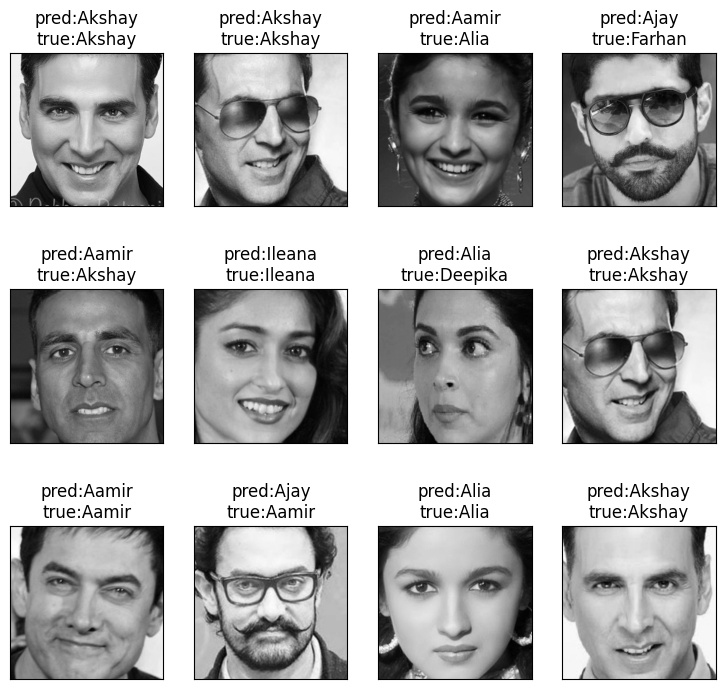

In [5]:

import matplotlib.pyplot as plt
%pip install lda

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2
import zipfile

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8*n_col, 2.4*n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

zip_path = '/content/drive/MyDrive/dataset.zip'
extracted_path = '/content/dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

dir_name = '/content/dataset/dataset/faces'
y = []
x = []
target_names = []
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        x.append(v)
        n_samples = n_samples + 1
        y.append(person_name)
        target_names.append(person_name)
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]
print(y.shape, x.shape, target_names.shape)
print("Number of samples:", n_samples)
n_classes = len(class_names)

print("Total dataset size")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Apply PCA for dimensionality reduction
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)

print("Extracting the top %d eigen faces from %d faces" % (n_components, x_train.shape[0]))
eigenfaces = pca.components_.reshape(n_components, h, w)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape, x_test_pca.shape)

# Create and train the ANN classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100), max_iter=2000, verbose=True, activation='relu', alpha=0.0001, learning_rate='adaptive')
clf.fit(x_train_pca, y_train)

print("Training complete!")

# Predict the labels for the test data
y_pred = clf.predict(x_test_pca)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Visualize the predicted results
prediction_titles = []

for i in range(y_pred.shape[0]):
    true_name = y_test[i]
    pred_name = y_pred[i]
    result = 'pred:%s\ntrue:%s' % (pred_name, true_name)
    prediction_titles.append(result)

plot_gallery(x_test, prediction_titles, h, w)
plt.show()